In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/housepricedata.csv')
df.head(5)
#target variable is AboveMedianPrice which is binary

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [20]:
#scale the data because some are in thousands while rest are in single digits
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=1)

In [6]:
#creating the ANN
model = Sequential()
#no of nodes in multiples of 10 (input size?)
input_layer = Dense(20, input_shape=(10,))
model.add(input_layer)

In [7]:
#hidden layers
hidden_layer1 = Dense(20, activation='relu')
hidden_layer2 = Dense(20, activation='relu')
model.add(hidden_layer1)
model.add(hidden_layer2)

In [8]:
#output layer
output_layer = Dense(1, activation='sigmoid')
model.add(output_layer)

In [9]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=20, validation_data = (x_test,y_test))

Epoch 1/100
52/52 [==============================] - 1s 8ms/step - loss: 0.6922 - accuracy: 0.5372 - val_loss: 0.6784 - val_accuracy: 0.6621
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.6546 - val_loss: 0.6677 - val_accuracy: 0.7443
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.7104 - val_loss: 0.6574 - val_accuracy: 0.7831
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.7417 - val_loss: 0.6464 - val_accuracy: 0.7808
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.7505 - val_loss: 0.6321 - val_accuracy: 0.8174
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.7798 - val_loss: 0.6141 - val_accuracy: 0.8242
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7926 - val_loss: 0.5954 - val_accuracy: 0.8219
Epoch 8/100
5

In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

14/14 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.9041
0.22781507670879364 0.9041095972061157


In [21]:
#pred
lst = [[12420, 7, 4, 2000, 3, 4, 1, 8, 2, 750]]
scaled_data = scaler.transform(lst)
result = model.predict(scaled_data)
result

1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.9970408]], dtype=float32)

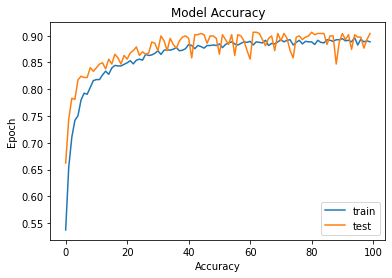

In [13]:
#visualize how accuracy varies with each epoch
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

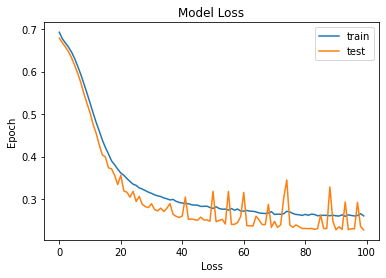

In [14]:
#visualize how loss varies with each epoch
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()